# Análise de Risco País
Este notebook realiza uma análise de risco país com base em fatores como:
- **Déficit Fiscal**
- **Crescimento Econômico**
- **Relação Arrecadação/Dívida**
- **Turbulências Políticas**

## **Passo 1:** Estrutura Inicial no Notebook

### Importando Bibliotecas

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Definindo Carteira e Período

In [ ]:
# Ativos de interesse
ativos = {
    "IBOVESPA": "^BVSP",      # Índice Bovespa
    "SP500": "^GSPC",         # S&P 500
    "OURO": "GC=F",           # Ouro (futuros)
    "VALE": "VALE3.SA",       # Vale S.A.
    "PETROBRAS": "PETR4.SA"   # Petrobras PN
}

# Período de análise
inicio = "2020-01-01"
fim = datetime.now().strftime('%Y-%m-%d')

### Coletando Dados do Yahoo Finance

In [4]:
# Baixando os dados do Yahoo Finance
dados = yf.download(list(ativos.values()), start=inicio, end=fim)["Adj Close"]

# Renomeando as colunas para os nomes dos ativos
dados.columns = ativos.keys()

# Exibindo os primeiros dados
dados.head()

[*********************100%***********************]  5 of 5 completed


,IBOVESPA,SP500,OURO,VALE,PETROBRAS
Date,,,,,
2020-01-02,1524.500000,10.621439,35.130035,118573.0,3257.850098
2020-01-03,1549.199951,10.534945,34.871395,117707.0,3234.850098
2020-01-06,1566.199951,10.659496,34.664471,116878.0,3246.280029
2020-01-07,1571.800049,10.617978,34.916656,116662.0,3237.179932
2020-01-08,1557.400024,10.552244,34.923119,116247.0,3253.050049


### Visualização Inicial

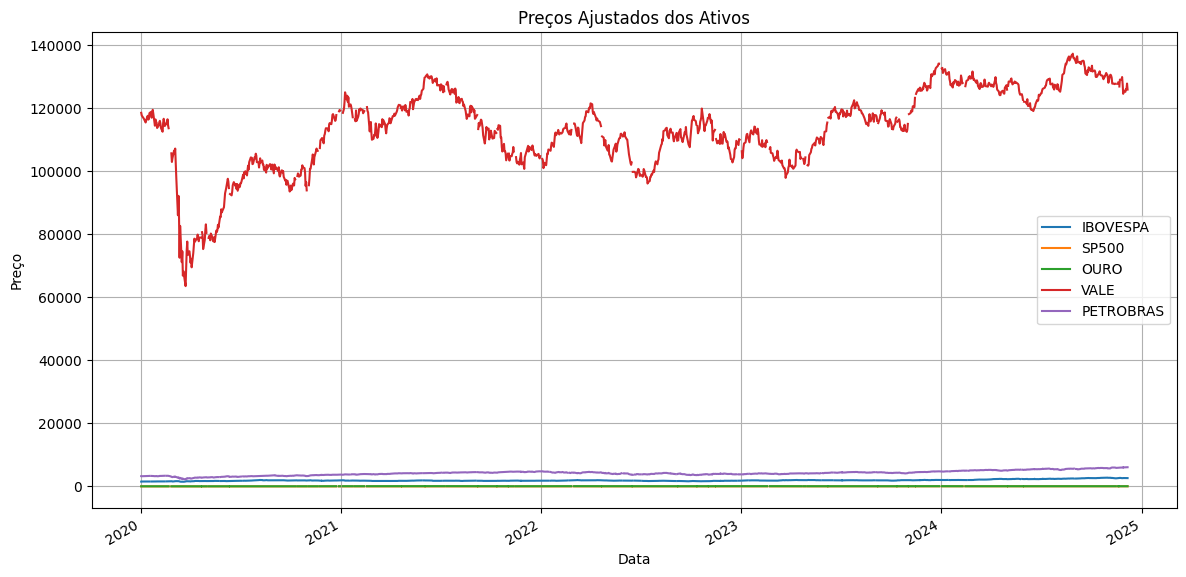

In [6]:
# Plotando os preços ajustados
dados.plot(figsize=(14, 7), title="Preços Ajustados dos Ativos", grid=True)
plt.ylabel("Preço")
plt.xlabel("Data")
plt.show()

## **Passo 2:** Análise de Risco País

### Cálculo da Retornos Diários

In [7]:
retornos_diarios = dados.pct_change().dropna()

# Exibindo os primeiros retornos
retornos_diarios.head()

C:\Users\josel\AppData\Local\Temp\ipykernel_9380\2322688253.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_diarios = dados.pct_change().dropna()


,IBOVESPA,SP500,OURO,VALE,PETROBRAS
Date,,,,,
2020-01-03,0.016202,-0.008143,-0.007362,-0.007304,-0.007060
2020-01-06,0.010973,0.011823,-0.005934,-0.007043,0.003533
2020-01-07,0.003576,-0.003895,0.007275,-0.001848,-0.002803
2020-01-08,-0.009161,-0.006191,0.000185,-0.003557,0.004902
2020-01-09,-0.003660,-0.003279,-0.013146,-0.002581,0.006655


### Volatilidade dos Ativos

In [8]:
# Volatilidade anualizada (252 dias úteis)
volatilidade = retornos_diarios.std() * np.sqrt(252)
print("Volatilidade anualizada dos ativos:")
print(volatilidade)

Volatilidade anualizada dos ativos:
IBOVESPA     0.160649
SP500        0.440053
OURO         0.369933
VALE         0.253839
PETROBRAS    0.211293
dtype: float64


### Correlação entre os Ativos

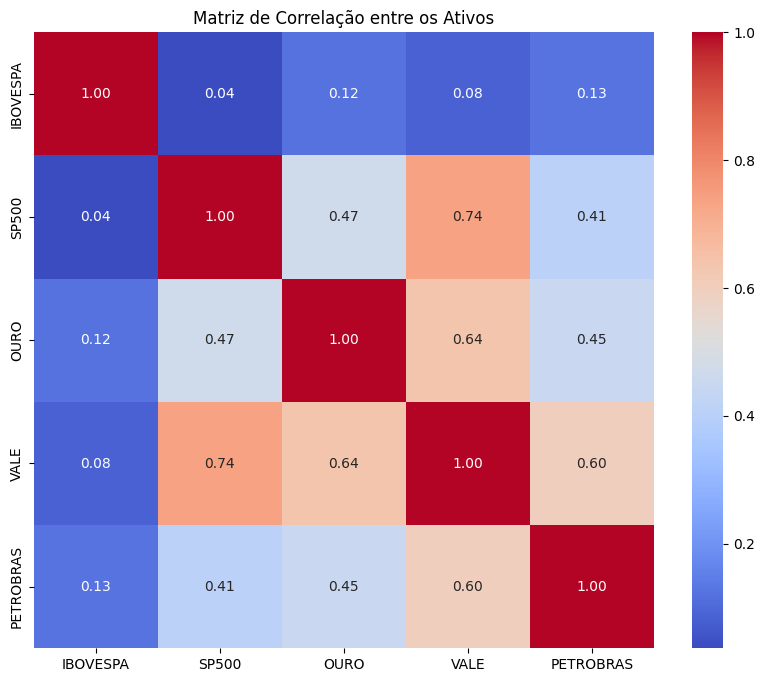

In [11]:
# Matriz de correlação
correlacao = retornos_diarios.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre os Ativos")
plt.show()

### Projeção de Risco País

- **Volatilidade do IBOVESPA** para medir o risco do mercado brasileiro.
- **Correlação com o S&P 500** para verificar o impacto de fatores globais.
- **Ouro** como um hedge contra risco.
- **Petrobras e Vale** como proxies de risco corporativo no Brasil.

In [12]:
# Calculando um índice de risco país simples
risco_pais = (
    volatilidade["IBOVESPA"] * 0.4 +  # Peso 40% na volatilidade do IBOVESPA
    (1 - correlacao.loc["IBOVESPA", "SP500"]) * 0.3 +  # Peso 30% na descorrelação com S&P 500
    (1 - correlacao.loc["IBOVESPA", "OURO"]) * 0.3    # Peso 30% na descorrelação com o ouro
)

print("Índice de Risco País (Brasil):", risco_pais)

Índice de Risco País (Brasil): 0.6170652085038701
